<a href="https://colab.research.google.com/github/yumi-jun/Data_Analysis/blob/main/%EC%9E%AC%ED%99%9C%ED%9B%88%EB%A0%A8_%EC%8B%9C%EA%B3%84%EC%97%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import re

# 데이터 로드
file_path ='TrackerData (1).csv'
data = pd.read_csv(file_path, delimiter=';')

# 데이터 파싱 함수
def parse_tracking_data(tracking_data):
    if pd.isna(tracking_data) or 'null' in tracking_data:
        return [None, None, None], [None, None, None, None]

    position_match = re.search(r'position\s*:\s*\(([^)]+)\)', tracking_data)
    rotation_match = re.search(r'rotation\s*:\s*\(([^)]+)\)', tracking_data)

    position = [float(num) for num in position_match.group(1).split(',')] if position_match else [None, None, None]
    rotation = [float(num) for num in rotation_match.group(1).split(',')] if rotation_match else [None, None, None, None]

    return position, rotation

# 각 포인트별 데이터 추출
tracking_points = data.columns[1:]  # 첫 번째 열은 시간 정보이므로 제외
positions = {}
rotations = {}

for point in tracking_points:
    print(point)
    extracted_data = data[point].apply(parse_tracking_data)
    positions[point] = [data[0] for data in extracted_data]
    rotations[point] = [data[1] for data in extracted_data]

# 위치 및 회전 데이터를 데이터프레임으로 저장
position_df = pd.DataFrame(positions, columns=tracking_points)
rotation_df = pd.DataFrame(rotations, columns=tracking_points)

# 결과 확인
print(position_df.head())
print(rotation_df.head())


LeftHand
RightHand
Head
LeftShoulder
RightShoulder
LeftElbow
RightElbow
Chest
           LeftHand         RightHand              Head     LeftShoulder  \
0  [-0.3, 0.8, 0.3]  [-0.1, 0.8, 0.2]  [-0.3, 1.0, 0.2]  [0.2, 0.7, 0.5]   
1  [-0.3, 0.8, 0.3]  [-0.1, 0.8, 0.2]  [-0.3, 1.0, 0.2]  [0.2, 0.7, 0.5]   
2  [-0.3, 0.8, 0.3]  [-0.1, 0.8, 0.2]  [-0.3, 1.0, 0.2]  [0.2, 0.7, 0.5]   
3  [-0.3, 0.8, 0.3]  [-0.1, 0.8, 0.2]  [-0.3, 1.0, 0.2]  [0.2, 0.7, 0.5]   
4  [-0.3, 0.8, 0.3]  [-0.1, 0.8, 0.2]  [-0.3, 1.0, 0.2]  [0.2, 0.7, 0.5]   

     RightShoulder         LeftElbow          RightElbow               Chest  
0  [0.1, 0.7, 0.4]  [-0.2, 0.6, 0.1]  [None, None, None]  [None, None, None]  
1  [0.1, 0.7, 0.4]  [-0.2, 0.6, 0.1]  [None, None, None]  [None, None, None]  
2  [0.1, 0.7, 0.4]  [-0.2, 0.6, 0.1]  [None, None, None]  [None, None, None]  
3  [0.1, 0.7, 0.4]  [-0.2, 0.6, 0.1]  [None, None, None]  [None, None, None]  
4  [0.1, 0.7, 0.4]  [-0.2, 0.6, 0.1]  [None, None, None]  [None, None,

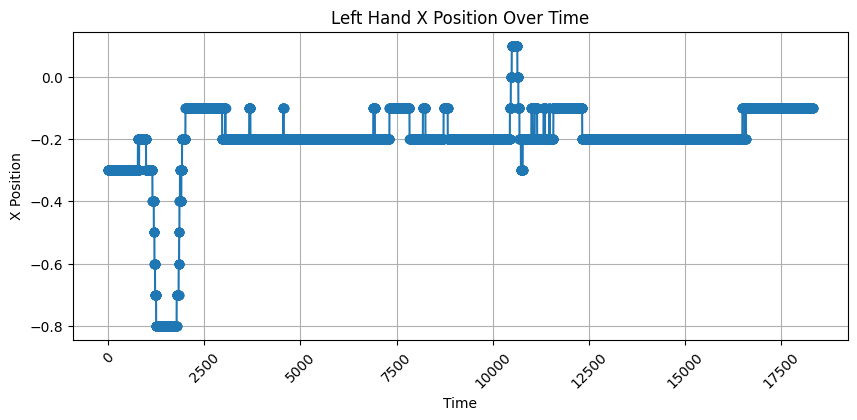

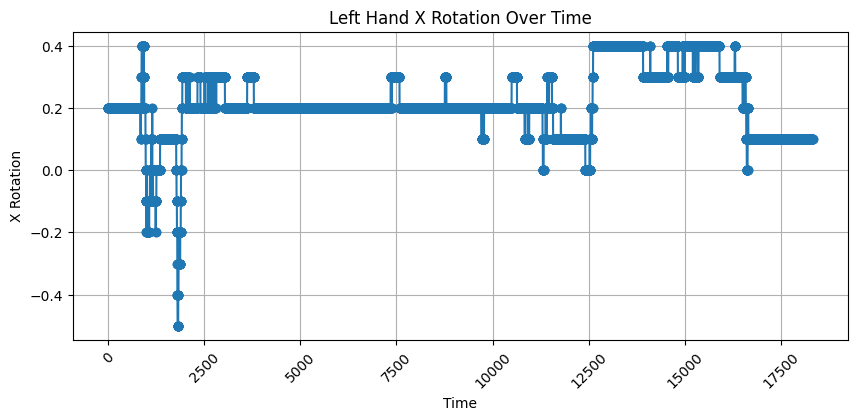

{'LeftHand': {'mean': -0.19959058900595014, 'std': 0.12635788566313697, 'min': -0.8, 'max': 0.1}, 'RightHand': {'mean': 0.26215950652328185, 'std': 0.18925341522261407, 'min': -0.1, 'max': 0.8}, 'Head': {'mean': -0.022211911130520224, 'std': 0.08071679714123108, 'min': -0.3, 'max': 0.1}, 'LeftShoulder': {'mean': 0.20000000000000004, 'std': 2.7755575615628914e-17, 'min': 0.2, 'max': 0.2}, 'RightShoulder': {'mean': 0.1001091881858383, 'std': 0.00330255908711753, 'min': 0.1, 'max': 0.2}, 'LeftElbow': {'mean': -0.20000000000000004, 'std': 2.7755575615628914e-17, 'min': -0.2, 'max': -0.2}, 'RightElbow': {'mean': None, 'std': None, 'min': None, 'max': None}, 'Chest': {'mean': None, 'std': None, 'min': None, 'max': None}} {'LeftHand': {'mean': 0.21466237240024022, 'std': 0.10870754808227599, 'min': -0.5, 'max': 0.4}, 'RightHand': {'mean': 0.05139472678639664, 'std': 0.25822797914837936, 'min': -0.7, 'max': 0.5}, 'Head': {'mean': -0.08989573666684864, 'std': 0.15287690059657028, 'min': -0.7, '

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# 데이터 로드
file_path = 'TrackerData (1).csv'
data = pd.read_csv(file_path, delimiter=';')

# 데이터 파싱 함수
def parse_tracking_data(tracking_data):
    if pd.isna(tracking_data) or 'null' in tracking_data:
        return [None, None, None], [None, None, None, None]

    position_match = re.search(r'position\s*:\s*\(([^)]+)\)', tracking_data)
    rotation_match = re.search(r'rotation\s*:\s*\(([^)]+)\)', tracking_data)

    position = [float(num) for num in position_match.group(1).split(',')] if position_match else [None, None, None]
    rotation = [float(num) for num in rotation_match.group(1).split(',')] if rotation_match else [None, None, None, None]

    return position, rotation

# 추적 포인트 설정
tracking_points = data.columns[1:]  # 첫 번째 열은 시간 정보이므로 제외

# 각 추적 포인트 데이터 추출 및 파싱
positions = {}
rotations = {}
for point in tracking_points:
    extracted_data = data[point].apply(parse_tracking_data)
    positions[point] = [data[0] for data in extracted_data if data[0][0] is not None]  # None을 제외한 유효한 데이터만 저장
    rotations[point] = [data[1] for data in extracted_data if data[1][0] is not None]

# 기술 통계 계산 함수
def calculate_descriptive_stats(data):
    filtered_data = [x for x in data if x is not None]
    if not filtered_data:
        return {"mean": None, "std": None, "min": None, "max": None}
    return {
        "mean": np.mean(filtered_data),
        "std": np.std(filtered_data),
        "min": np.min(filtered_data),
        "max": np.max(filtered_data)
    }

# 각 추적 포인트의 X 위치 및 X 회전에 대한 기술 통계
stats_positions = {point: calculate_descriptive_stats([pos[0] for pos in positions[point]])
                   for point in positions}
stats_rotations = {point: calculate_descriptive_stats([rot[0] for rot in rotations[point]])
                   for point in rotations}

# 시계열 시각화
def plot_time_series(data, title, y_label):
    plt.figure(figsize=(10, 4))
    plt.plot(data, marker='o', linestyle='-')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel(y_label)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

# 선택된 추적 포인트의 X 위치 및 X 회전 시각화
plot_time_series([pos[0] for pos in positions['LeftHand']], 'Left Hand X Position Over Time', 'X Position')
plot_time_series([rot[0] for rot in rotations['LeftHand']], 'Left Hand X Rotation Over Time', 'X Rotation')

# 기술 통계 결과 출력
print(stats_positions, stats_rotations)


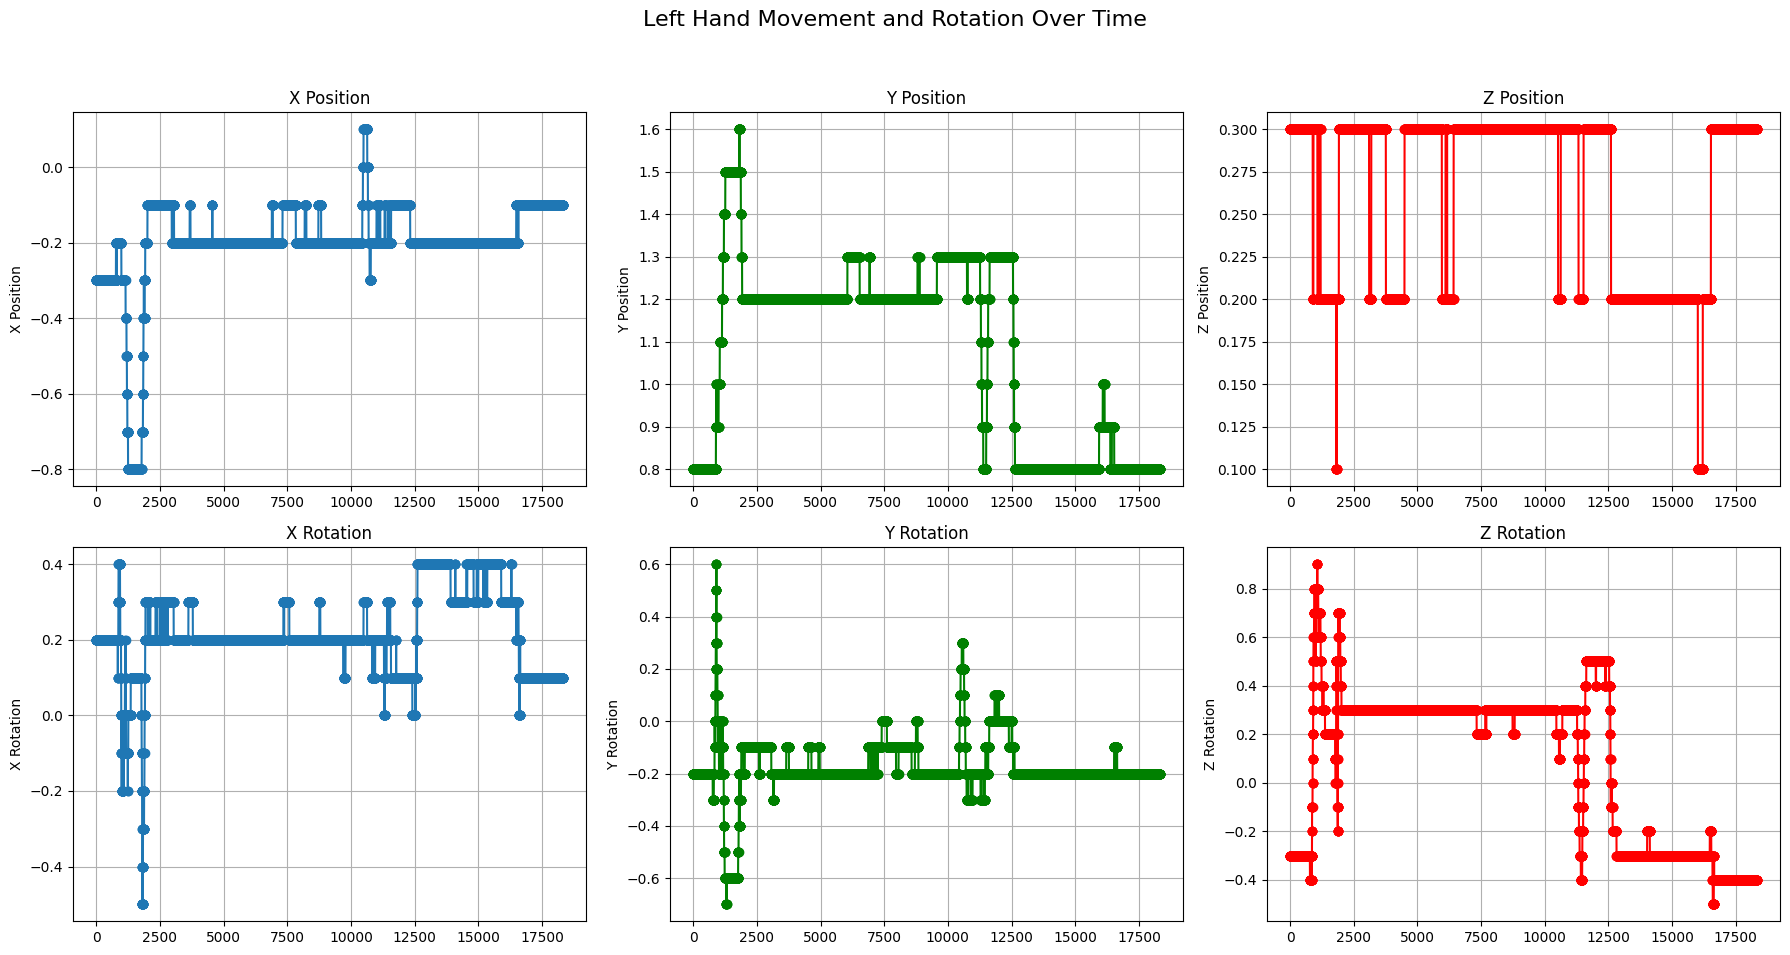

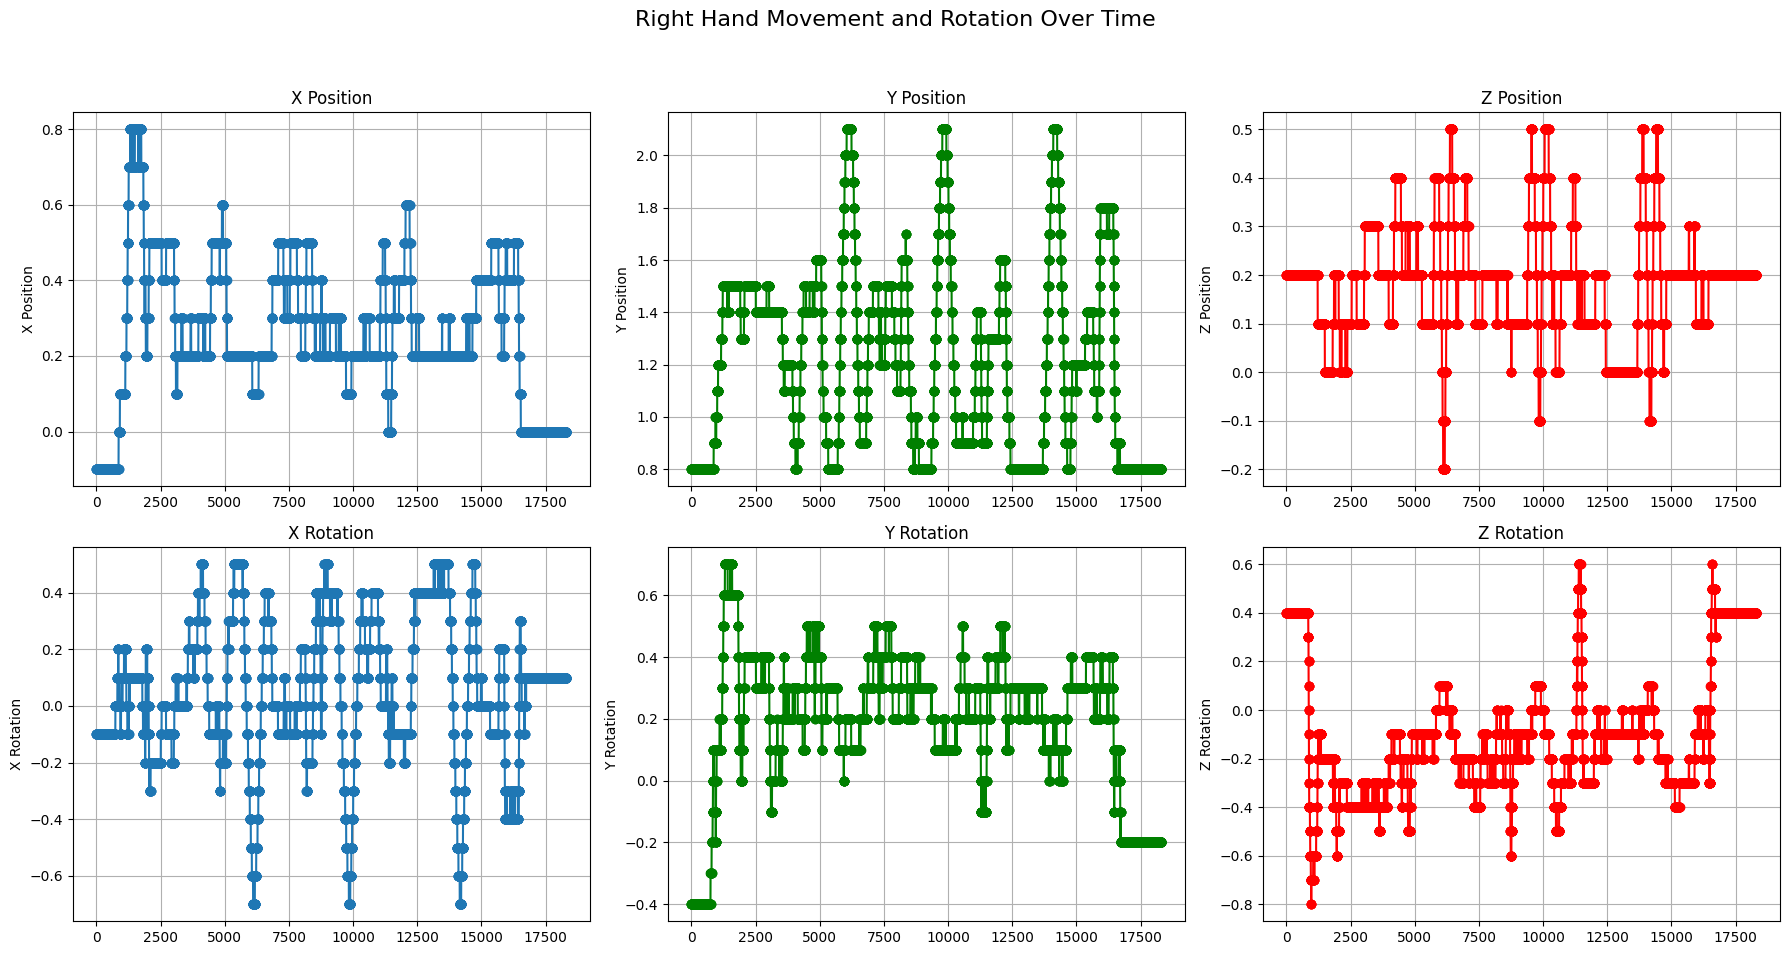

In [5]:
# 시각화 함수 확장 - X, Y, Z 위치 및 회전 시각화
def plot_time_series_xyz(positions, rotations, point_name):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
    fig.suptitle(f'{point_name} Movement and Rotation Over Time', fontsize=16)

    # 위치 데이터 시각화
    axes[0, 0].plot([pos[0] for pos in positions], marker='o', linestyle='-')
    axes[0, 0].set_title('X Position')
    axes[0, 0].set_ylabel('X Position')
    axes[0, 0].grid(True)

    axes[0, 1].plot([pos[1] for pos in positions], marker='o', linestyle='-', color='green')
    axes[0, 1].set_title('Y Position')
    axes[0, 1].set_ylabel('Y Position')
    axes[0, 1].grid(True)

    axes[0, 2].plot([pos[2] for pos in positions], marker='o', linestyle='-', color='red')
    axes[0, 2].set_title('Z Position')
    axes[0, 2].set_ylabel('Z Position')
    axes[0, 2].grid(True)

    # 회전 데이터 시각화
    axes[1, 0].plot([rot[0] for rot in rotations], marker='o', linestyle='-')
    axes[1, 0].set_title('X Rotation')
    axes[1, 0].set_ylabel('X Rotation')
    axes[1, 0].grid(True)

    axes[1, 1].plot([rot[1] for rot in rotations], marker='o', linestyle='-', color='green')
    axes[1, 1].set_title('Y Rotation')
    axes[1, 1].set_ylabel('Y Rotation')
    axes[1, 1].grid(True)

    axes[1, 2].plot([rot[2] for rot in rotations], marker='o', linestyle='-', color='red')
    axes[1, 2].set_title('Z Rotation')
    axes[1, 2].set_ylabel('Z Rotation')
    axes[1, 2].grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# 'LeftHand'와 'RightHand'의 X, Y, Z 위치 및 회전 시각화
plot_time_series_xyz(positions['LeftHand'], rotations['LeftHand'], 'Left Hand')
plot_time_series_xyz(positions['RightHand'], rotations['RightHand'], 'Right Hand')
